In [1]:
import matplotlib.pyplot as plt
#import datetime
import h5py

In [2]:
with h5py.File(f"results.hdf5", 'r') as resultsFile:
    #extract the data and store in an array

    means_obj = resultsFile["means_obj"][...][1:]
    means_pop = resultsFile["means_pop"][...][1:]
    stds_obj = resultsFile["stds_obj"][...][1:]
    stds_pop = resultsFile["stds_pop"][...][1:]
    means_obj_m = resultsFile["means_obj_m"][...][1:]
    means_pop_m = resultsFile["means_pop_m"][...][1:]
    stds_obj_m = resultsFile["stds_obj_m"][...][1:]
    stds_pop_m = resultsFile["stds_pop_m"][...][1:]

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

# Example data (replace with actual data from h5py)
xs = np.linspace(2, 8, 7)  # Example x-values (e.g., number of qubits)

# Bounds for shading (replace with actual upper/lower bounds)
upper_obj = means_obj + stds_obj
lower_obj = means_obj - stds_obj
upper_pop = means_pop + stds_pop
lower_pop = means_pop - stds_pop

upper_obj_m = means_obj_m + stds_obj_m
lower_obj_m = means_obj_m - stds_obj_m
upper_pop_m = means_pop_m + stds_pop_m
lower_pop_m = means_pop_m - stds_pop_m

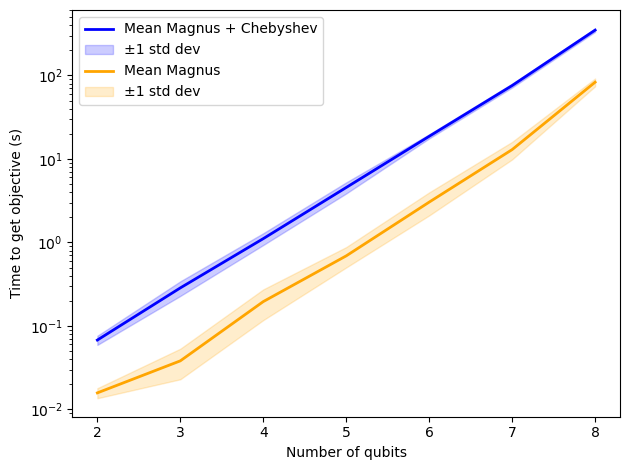

In [15]:
# Create the first plot (Objective) with logarithmic y-axis
fig1, ax1 = plt.subplots()

# Plot the objective data (Magnus and Chebyshev)
ax1.plot(xs, means_obj, label="Mean Magnus + Chebyshev", color='blue', linestyle='solid', lw=2)
ax1.fill_between(xs, lower_obj, upper_obj,label="±1 std dev", color='blue', alpha=0.2)

ax1.plot(xs, means_obj_m, label="Mean Magnus", color='orange', linestyle='solid', lw=2)
ax1.fill_between(xs, lower_obj_m, upper_obj_m,label="±1 std dev", color='orange', alpha=0.2)

# Set logarithmic scale for the y-axis of the first plot (Objective)
ax1.set_yscale('log')
ax1.set_xlabel("Number of qubits")
ax1.set_ylabel("Time to get objective (s)")

# Add legend for the objective plot
ax1.legend(loc='upper left')

# Save and display the first plot
fig1.tight_layout()
fig1.savefig("Objective_times.png")
plt.show()

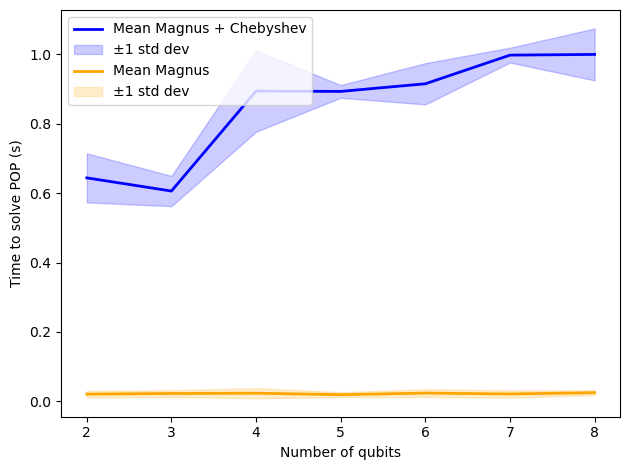

In [16]:
# Create the first plot (Objective) with logarithmic y-axis
fig2, ax2 = plt.subplots()

# Plot the objective data (Magnus and Chebyshev)
ax2.plot(xs, means_pop, label="Mean Magnus + Chebyshev", color='blue', linestyle='solid', lw=2)
ax2.fill_between(xs, lower_pop, upper_pop,label="±1 std dev", color='blue', alpha=0.2)

ax2.plot(xs, means_pop_m, label="Mean Magnus", color='orange', linestyle='solid', lw=2)
ax2.fill_between(xs, lower_pop_m, upper_pop_m,label="±1 std dev", color='orange', alpha=0.2)

ax2.set_xlabel("Number of qubits")
ax2.set_ylabel("Time to solve POP (s)")

# Add legend for the objective plot
ax2.legend(loc='upper left')

# Save and display the first plot
fig2.tight_layout()
fig2.savefig("POP_times.png")
plt.show()

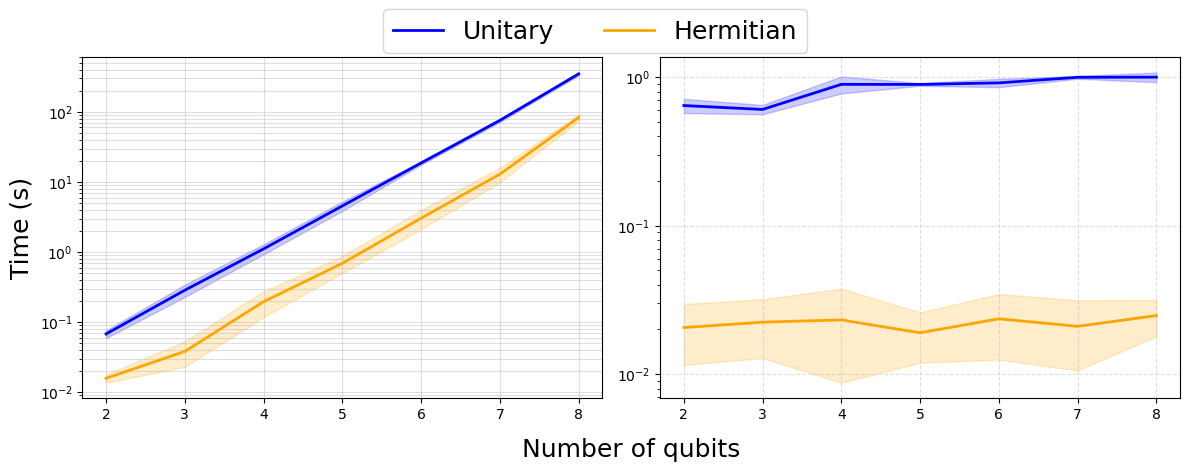

In [4]:
import matplotlib.pyplot as plt

# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# --- Plot 1: Objective (Log Scale) ---
ax1.plot(xs, means_obj, label="Unitary", color='blue', linestyle='-', lw=2)
ax1.fill_between(xs, lower_obj, upper_obj, color='blue', alpha=0.2)
ax1.plot(xs, means_obj_m, label="Hermitian", color='orange', linestyle='-', lw=2)
ax1.fill_between(xs, lower_obj_m, upper_obj_m, color='orange', alpha=0.2)

ax1.set_yscale('log')

ax1.set_ylabel("Time (s)", fontsize=18)
ax1.grid(which='both', linestyle='-', alpha=0.4)

# --- Plot 2: POP (Linear Scale) ---
ax2.plot(xs, means_pop, label="Unitary", color='blue', linestyle='-', lw=2)
ax2.fill_between(xs, lower_pop, upper_pop, color='blue', alpha=0.2)
ax2.plot(xs, means_pop_m, label="Hermitian", color='orange', linestyle='-', lw=2)
ax2.fill_between(xs, lower_pop_m, upper_pop_m, color='orange', alpha=0.2)

ax2.set_yscale('log')

ax2.grid(linestyle='--', alpha=0.4)

fig.text(0.53, -0.05, "Number of qubits", ha='center', fontsize=18)

# --- Shared Legend ---
# Combine legend handles from both plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', 
           bbox_to_anchor=(0.5, 1.1),  # Adjust position above the plots
           ncol=2, fontsize=18)  # 2-column layout

# Adjust layout to prevent legend overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Make space for the legend

# Save
fig.savefig("combined_plot.pdf", dpi=600, bbox_inches='tight')
plt.show()